In [121]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import operator

**Q1**

In [6]:
train_df = pd.read_csv('loan-train.csv')
test_df = pd.read_csv('loan-test.csv')
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)
train_df=train_df[['Gender','Married','Education','Self_Employed','Credit_History','Loan_Status']]
train_df.head()


,Gender,Married,Education,Self_Employed,Credit_History,Loan_Status
1,Male,Yes,Graduate,No,1.0,N
2,Male,Yes,Graduate,Yes,1.0,Y
3,Male,Yes,Not Graduate,No,1.0,Y
4,Male,No,Graduate,No,1.0,Y
5,Male,Yes,Graduate,Yes,1.0,Y


In [7]:
train_df['Gender']=train_df['Gender'].replace(to_replace='Male',value='1')
train_df['Gender']=train_df['Gender'].replace(to_replace='Female',value='0')


train_df['Married']=train_df['Married'].replace(to_replace='Yes',value='1')
train_df['Married']=train_df['Married'].replace(to_replace='No',value='0')


train_df['Self_Employed']=train_df['Self_Employed'].replace(to_replace='No',value='0')
train_df['Self_Employed']=train_df['Self_Employed'].replace(to_replace='Yes',value='1')


train_df['Education']=train_df['Education'].replace(to_replace='Graduate',value='1')
train_df['Education']=train_df['Education'].replace(to_replace='Not Graduate',value='0')
train_df.head()

,Gender,Married,Education,Self_Employed,Credit_History,Loan_Status
1,1,1,1,0,1.0,N
2,1,1,1,1,1.0,Y
3,1,1,0,0,1.0,Y
4,1,0,1,0,1.0,Y
5,1,1,1,1,1.0,Y


In [18]:
X = train_df.drop(columns=['Loan_Status'])
Y = train_df['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3)
cols=train_df.columns
classes = ['Y','N']

In [22]:
gtree = DecisionTreeClassifier(criterion='gini')
etree = DecisionTreeClassifier(criterion='entropy')


Decision Tree with Gini Index as criterion
Accuracy: 0.7708333333333334
Classification Report:               precision    recall  f1-score   support

           N       0.79      0.45      0.57        49
           Y       0.77      0.94      0.84        95

    accuracy                           0.77       144
   macro avg       0.78      0.69      0.71       144
weighted avg       0.77      0.77      0.75       144



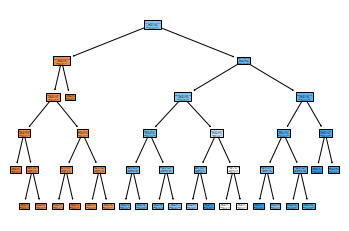

In [20]:
model = gtree.fit(x_train,y_train)
ypred1 = model.predict(x_test)
print("Decision Tree with Gini Index as criterion")
print("Accuracy:",accuracy_score(y_test,ypred1))
print("Classification Report:",classification_report(y_test,ypred1))
d_tree = plot_tree(gtree,feature_names = cols,class_names = classes,filled=True)

Decision Tree with Entropy as criterion
Accuracy: 0.7708333333333334
Classification Report:               precision    recall  f1-score   support

           N       0.79      0.45      0.57        49
           Y       0.77      0.94      0.84        95

    accuracy                           0.77       144
   macro avg       0.78      0.69      0.71       144
weighted avg       0.77      0.77      0.75       144



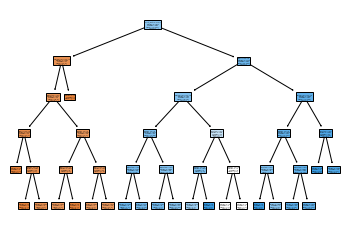

In [23]:
model = etree.fit(x_train,y_train)
ypred1 = model.predict(x_test)
print("Decision Tree with Entropy as criterion")
print("Accuracy:",accuracy_score(y_test,ypred1))
print("Classification Report:",classification_report(y_test,ypred1))
d_tree = plot_tree(etree,feature_names = cols,class_names = classes,filled=True)

**Q2**

In [124]:
def Entropy(pos,neg,tot):
    if pos==0 or neg == 0 or tot == 0:
        s=0
    else:
        s = -(pos/tot*np.log2(pos/tot)+neg/tot*np.log2(neg/tot))
    return s

In [125]:
df2 = pd.read_csv('play_tennis.csv')
df2.drop(columns=['day'],inplace=True)
df2.head()

def DataSelection(df2,column,output):
    counts = df2[column].value_counts()
    ser = df2[column].unique()
    entropy=[]
    for i in ser:
        li = []
        #print(i,counts[i])
        tot = counts[i]
        c = df2.loc[df2[column]==i][output]
        un = c.unique()
        #print(un)
        count = c.value_counts()
        pos=neg=0
        for i in un:
            #print(i,count[i])
            if i=='Yes':
                pos = count[i]
            elif i=='No':
                neg = count[i]
        #print("Pos",pos,"Neg",neg,"Tot",tot)
        e = Entropy(pos,neg,tot)
        #print(e)
        entropy.append((tot,e))
    return entropy

        
    
    




In [128]:
def ClassEntropy(df,output):

    counts = df[output].value_counts()
    tot = sum(counts)
    values = df[output].unique()
    for i in values:
        #print(i,counts[i])
        if i=='Yes':
            pos = counts[i]
        elif i=='No':
            neg = counts[i]
    s = Entropy(pos,neg,tot)
    print(s)
    return tot,s


def Gain(df, cname,output,S):
    entropies = DataSelection(df2,cname,output)
    for i in entropies:
        tot,e = i
        S -= (tot/total * e)
    #print("gain",S)
    return S

    



In [129]:
output = 'play'
total, S = ClassEntropy(df2,output)
cols = list(df2.columns)
cols.remove(output)
print(cols)
gain = {}
for i in cols:
    g = Gain(df2,i,output,S)
    gain[i]=g
print(gain)
print("Max Information Gain",max(gain.items(), key=operator.itemgetter(1)))


0.9402859586706311
['outlook', 'temp', 'humidity', 'wind']
{'outlook': 0.24674981977443933, 'temp': 0.02922256565895487, 'humidity': 0.15183550136234164, 'wind': 0.048127030408269544}
Max Information Gain ('outlook', 0.24674981977443933)
